<a href="https://colab.research.google.com/github/San2855/Desafio-data-science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [42]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [46]:
def analise_faturamento(loja):
  soma_faturamento = 0
  for preco in loja['Preço']:
    soma_faturamento += round(preco, 0)
  print(f"O faturamento da loja foi de:", soma_faturamento)
  return soma_faturamento

O faturamento da loja foi de: 1534501.0
O faturamento da loja foi de: 1488437.0
O faturamento da loja foi de: 1464051.0
O faturamento da loja foi de: 1384490.0


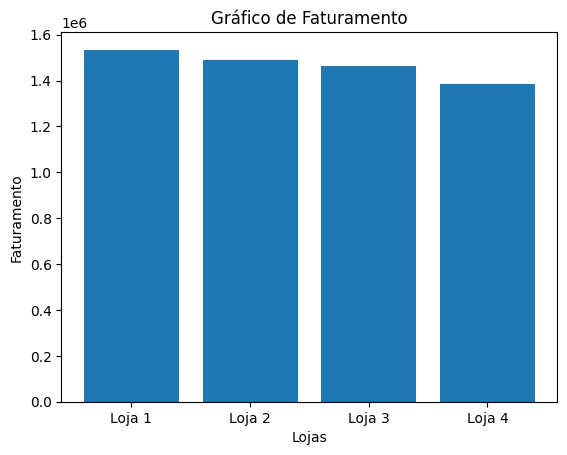

In [48]:
faturamento1 = analise_faturamento(loja)
faturamento2 = analise_faturamento(loja2)
faturamento3 = analise_faturamento(loja3)
faturamento4 = analise_faturamento(loja4)
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

plt.bar(lojas, faturamentos)
plt.title("Gráfico de Faturamento")
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.show()

# 2. Vendas por Categoria


In [62]:
def analise_de_venda_por_categoria(loja):
    return loja.groupby('Categoria do Produto')['Preço'].sum()

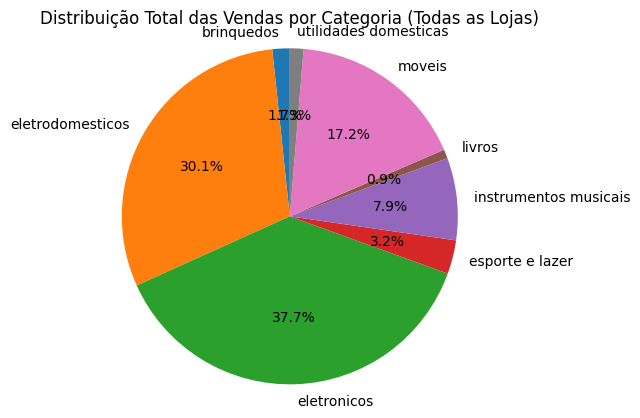

In [67]:
loja_total = pd.concat([loja, loja2, loja3, loja4])

vendas_por_categoria = analise_de_venda_por_categoria(loja_total)


plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição Total das Vendas por Categoria (Todas as Lojas)')
plt.axis('equal')
plt.show()

# 3. Média de Avaliação das Lojas

In [68]:
def media_avaliacao_loja(loja):
  return round(loja['Avaliação da compra'].mean(), 2)

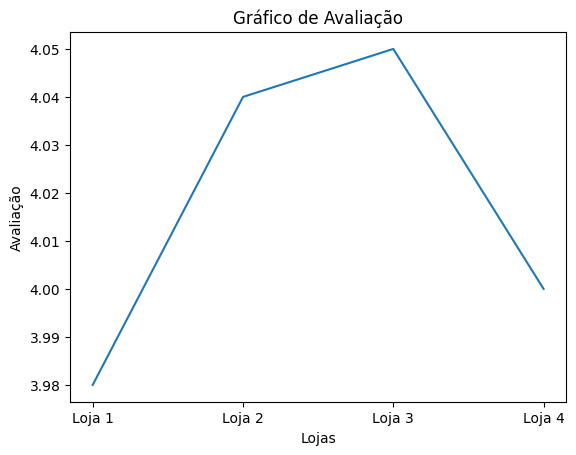

In [75]:
media1 = media_avaliacao_loja(loja)
media2 = media_avaliacao_loja(loja2)
media3 = media_avaliacao_loja(loja3)
media4 = media_avaliacao_loja(loja4)
medias = [media1, media2, media3, media4]

plt.plot(lojas, medias)
plt.title("Gráfico de Avaliação")
plt.xlabel('Lojas')
plt.ylabel('Avaliação')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [37]:
def analise_de_produto_mais_e_menos_vendido(loja):
    produto_mais_vendido = loja['Produto'].mode()[0]
    print(f"O produto mais vendido dessa loja foi:", produto_mais_vendido)
    produto_menos_vendido = loja['Produto'].value_counts().idxmin()
    print(f"O produto menos vendido dessa loja foi:", produto_menos_vendido)

In [38]:
analise_de_produto_mais_e_menos_vendido(loja)
analise_de_produto_mais_e_menos_vendido(loja2)
analise_de_produto_mais_e_menos_vendido(loja3)
analise_de_produto_mais_e_menos_vendido(loja4)

O produto mais vendido dessa loja foi: Guarda roupas
O produto menos vendido dessa loja foi: Headset
O produto mais vendido dessa loja foi: Iniciando em programação
O produto menos vendido dessa loja foi: Jogo de tabuleiro
O produto mais vendido dessa loja foi: Kit banquetas
O produto menos vendido dessa loja foi: Blocos de montar
O produto mais vendido dessa loja foi: Cama box
O produto menos vendido dessa loja foi: Guitarra


# 5. Frete Médio por Loja


In [39]:
def frete_medio(loja):
  media = round(loja['Frete'].mean(), 2)
  print("A média do valor do frete da loja foi de:", media)

In [41]:
frete_medio(loja)
frete_medio(loja2)
frete_medio(loja3)
frete_medio(loja4)

A média do valor do frete da loja foi de: 34.69
A média do valor do frete da loja foi de: 33.62
A média do valor do frete da loja foi de: 33.07
A média do valor do frete da loja foi de: 31.28


In [77]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[loja_total['lat'].mean(), loja_total['lon'].mean()], zoom_start=13)

HeatMap(data=loja_total[['lat', 'lon']].values).add_to(mapa)

mapa.save('mapa_calor.html')

mapa